# Исследовательский и статистический анализ данных сервиса Яндекс Афиша

Автор: Амелькин Павел

Дата: 18.11.2025

## Цели и задачи проекта

Цель проекта - используя данные сервиса Яндекс Афиша провести исследовательский анализ данных, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

Задачи:
1. Загрузка данных и знакомство с ними
2. Предобработка данных и подготовка их к исследованию
3. Исследовательский анализ данных
4. Статистический анализ данных
5. Общий вывод и рекомендации

## Описание данных

Яндекс Афиша - сервис бронирования билетов. С его помощью пользователи могут узнавать информацию о мероприятиях в разных городах и покупать на них билеты. Сервис сотрудничает с партнёрами — организаторами мероприятий и билетными операторами, которые предоставляют информацию о событиях и выставляют билеты на продажу.

Данные представлены за период с 1 июня по 30 октября 2024 года.

**final_tickets_orders_df.csv** — датасет включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Датасет содержит поля:

`order_id` — уникальный идентификатор заказа.

`user_id` — уникальный идентификатор пользователя.

`created_dt_msk` — дата создания заказа (московское время).

`created_ts_msk` — дата и время создания заказа (московское время).

`days_since_prev` — количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

`event_id` — идентификатор мероприятия из таблицы events.

`cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.

`age_limit` — возрастное ограничение мероприятия.

`currency_code` — валюта оплаты, например rub для российских рублей.

`device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.

`revenue` — выручка от заказа.

`service_name` — название билетного оператора.

`tickets_count` — количество купленных билетов.

`total` — общая сумма заказа.

**final_tickets_events_df** — датасет включает информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит поля:

`event_id` — уникальный идентификатор мероприятия.

`event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.

`event_type_description` — описание типа мероприятия.

`event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.

`organizers` — организаторы мероприятия.

`region_name` — название региона.

`city_name` — название города.

`venue_id` — уникальный идентификатор площадки.

`venue_name` — название площадки.

`venue_address` — адрес площадки.

**final_tickets_tenge_df.csv** - датасет включает информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит поля:

`nominal` — номинал (100 тенге).

`data` — дата.

`curs` — курс тенге к рублю.

`cdx` — обозначение валюты (kzt).

## Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных и подготовка их к исследованию
3. Исследовательский анализ данных
4. Статистический анализ данных
5. Общий вывод и рекомендации

## 1. Загрузка данных и знакомство с ними

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
!gdown https://drive.google.com/uc?id=1iLfHBTtl43epJxlSQ4GCNvmiIf1Yvadu -O final_tickets_orders.csv
!gdown https://drive.google.com/uc?id=1Itd43dcJQgRzsMs1T1hCGTbQyQUhNxBO -O final_tickets_events.csv
!gdown https://drive.google.com/uc?id=14Y7sEUpx28wZIdlXsOg4sP-L7Z4jks0M -O final_tickets_tenge.csv

Downloading...
From: https://drive.google.com/uc?id=1iLfHBTtl43epJxlSQ4GCNvmiIf1Yvadu
To: /content/final_tickets_orders.csv
100% 37.1M/37.1M [00:00<00:00, 65.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Itd43dcJQgRzsMs1T1hCGTbQyQUhNxBO
To: /content/final_tickets_events.csv
100% 5.86M/5.86M [00:00<00:00, 34.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=14Y7sEUpx28wZIdlXsOg4sP-L7Z4jks0M
To: /content/final_tickets_tenge.csv
100% 9.63k/9.63k [00:00<00:00, 21.7MB/s]


In [ ]:
final_tickets_orders = pd.read_csv('final_tickets_orders.csv')
final_tickets_events = pd.read_csv('final_tickets_events.csv')
final_tickets_tenge = pd.read_csv('final_tickets_tenge.csv')

In [ ]:
for df in [final_tickets_orders, final_tickets_events, final_tickets_tenge]:
  display(df.head(3))

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt


In [ ]:
for df in [final_tickets_orders, final_tickets_events, final_tickets_tenge]:
  print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [ ]:
(
    final_tickets_orders.isna().mean()
    .rename('% nan')
    .sort_values(ascending=False)
    .apply(lambda x: '{:.2%}'.format(x))
)

,% nan
days_since_prev,7.54%
order_id,0.00%
created_dt_msk,0.00%
created_ts_msk,0.00%
event_id,0.00%
user_id,0.00%
cinema_circuit,0.00%
age_limit,0.00%
device_type_canonical,0.00%
currency_code,0.00%


In [ ]:
final_tickets_orders.describe()

,order_id,event_id,age_limit,revenue,tickets_count,total,days_since_prev
count,2.908490e+05,290849.000000,290849.000000,290849.000000,290849.000000,290849.000000,268909.000000
mean,4.326812e+06,438079.127702,10.211278,625.083054,2.754230,7526.465613,3.222525
std,2.497578e+06,147396.389016,6.518124,1227.316214,1.170467,15328.267730,11.355158
min,1.000000e+00,4436.000000,0.000000,-90.760000,1.000000,-358.850000,0.000000
25%,2.164039e+06,361961.000000,6.000000,116.790000,2.000000,2156.870000,0.000000
50%,4.327816e+06,498329.000000,12.000000,355.340000,3.000000,4771.390000,0.000000
75%,6.488606e+06,546284.000000,16.000000,809.750000,4.000000,8955.950000,1.000000
max,8.653108e+06,592325.000000,18.000000,81174.540000,57.000000,811745.400000,148.000000


### Промежуточный вывод

Данные из обоих датасетов соответсвуют описанию.

Таблица **final_tickets_orders:**

* Cодержит 290849 строк и 14 столбцов;

* Пропуски содержатся только в столбце `days_since_prev` (~8%), что удовлетворяет условию: если у пользователя до этого не было покупок, то данные содержат пропуск;

* Столбцы `created_dt_msk` и `created_ts_msk` имеют тип данных object, их следует привести к типу datetime;

* Столбец `age_limit` можно оптимизировать по размерности. Также стоит обратить внимание на отрицательные значения в столбце `revenue` и `total`;

Таблица **final_tickets_events:**

* Cодержит 22427 строк и 11 столбцов. Пропуски отсутствуют;

* Все столбцы имеют кореектный тип данных и размерность;

Таблица **final_tickets_tenge:**

* Cодержит 357 строк и 4 столбца. Пропуски отсутствуют;

* Столбец `data` стоит привести к типу datetime, а столбец `nominal` оптимизировать по размерности.

## 2. Предобработка данных и подготовка их к исследованию

### Преобразование типов данных

In [ ]:
final_tickets_orders['created_dt_msk'] = pd.to_datetime(final_tickets_orders['created_dt_msk'])
final_tickets_orders['created_ts_msk'] = pd.to_datetime(final_tickets_orders['created_ts_msk'])

final_tickets_orders['age_limit'] = final_tickets_orders['age_limit'].astype('int8')
final_tickets_orders['order_id'] = final_tickets_orders['order_id'].astype('int32')
final_tickets_orders['event_id'] = final_tickets_orders['event_id'].astype('int32')
final_tickets_orders['tickets_count'] = final_tickets_orders['tickets_count'].astype('int32')

final_tickets_orders['revenue'] = final_tickets_orders['revenue'].astype('float32')
final_tickets_orders['total'] = final_tickets_orders['total'].astype('float32')
final_tickets_orders['days_since_prev'] = final_tickets_orders['days_since_prev'].astype('float16')


final_tickets_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290849 non-null  int32         
 1   user_id                290849 non-null  object        
 2   created_dt_msk         290849 non-null  datetime64[ns]
 3   created_ts_msk         290849 non-null  datetime64[ns]
 4   event_id               290849 non-null  int32         
 5   cinema_circuit         290849 non-null  object        
 6   age_limit              290849 non-null  int8          
 7   currency_code          290849 non-null  object        
 8   device_type_canonical  290849 non-null  object        
 9   revenue                290849 non-null  float32       
 10  service_name           290849 non-null  object        
 11  tickets_count          290849 non-null  int32         
 12  total                  290849 non-null  floa

In [ ]:
final_tickets_tenge['data'] = pd.to_datetime(final_tickets_tenge['data'])

final_tickets_tenge['nominal'] = final_tickets_tenge['nominal'].astype('int8')
final_tickets_tenge['curs'] = final_tickets_tenge['curs'].astype('float16')

final_tickets_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int8          
 2   curs     357 non-null    float16       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float16(1), int8(1), object(1)
memory usage: 6.8+ KB


In [ ]:
columns_to_check = ['cinema_circuit', 'currency_code', 'device_type_canonical', 'age_limit', 'tickets_count', 'days_since_prev']

for col in columns_to_check:
    print(f'Столбец {col}:')
    print(final_tickets_orders[col].unique(), '\n')

Столбец cinema_circuit:
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм'] 

Столбец currency_code:
['rub' 'kzt'] 

Столбец device_type_canonical:
['mobile' 'desktop'] 

Столбец age_limit:
[16  0 18 12  6] 

Столбец tickets_count:
[ 4  2  3  1  5  6 10  9  7 13 15 11  8 14 12 47 27 17 19 57 30 37] 

Столбец days_since_prev:
[ nan  75.  83.  19.  16.   0.   1.  74.  13.  25.  30.  29.  23.  63.
  14.  11.   7.   5.  26.  10.  15.   3.   4.  70.  20.  35.  33.  22.
  53.  39.  31.  17.  27.  40.  24.  12.  47.   9.   2.   6.  51.  55.
  18.  68.  52.   8.  71.  28.  46. 134.  41.  79.  86.  60.  49. 122.
  32.  78.  80.  38.  37.  85.  88.  43. 128.  61. 108.  21.  50.  81.
 137.  48.  45.  94.  34.  84. 107.  42.  44.  56.  82. 123. 101.  69.
 115.  97.  36. 112.  65.  99.  67.  91.  95.  57.  77.  58.  73.  59.
 132.  93.  72. 129.  62. 118.  96. 100. 105.  54.  76. 131. 104.  92.
 114. 127. 109. 121.  66.  64. 110. 103. 148.  90.  98.  89. 120. 139.
 144. 102.  87. 135. 116

### Обработка технических ошибок

In [ ]:
(
    (final_tickets_orders['total'] < 0).agg(['sum', 'mean'])
    .reset_index()
    .pivot_table(columns='index')
    .rename_axis(None, axis=1)
    .apply(lambda col: col.apply(lambda x: '{:.2%}'.format(x)) if col.name == 'mean' else col.astype('int'))
)

,mean,sum
total,0.13%,383


В некоторых случаях значение общей суммы заказа может быть отрицательным. Это, вероятнно, может происходить из-за технической ошибки. Такие строки лучше исключить из анализа, их немного и это не скажется на дальнейшей работе.

In [ ]:
final_tickets_orders_filtered = final_tickets_orders[final_tickets_orders['total'] >= 0].reset_index(drop=True)

### Обработка выбросов

In [ ]:
plt.style.use('ggplot')

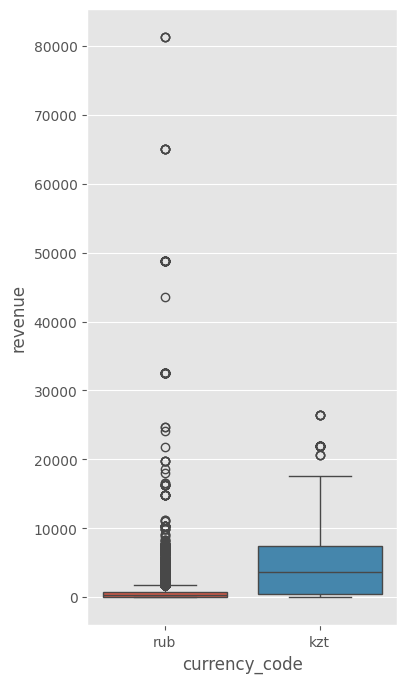

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=final_tickets_orders_filtered, x='currency_code', y='revenue', hue='currency_code')
plt.show()

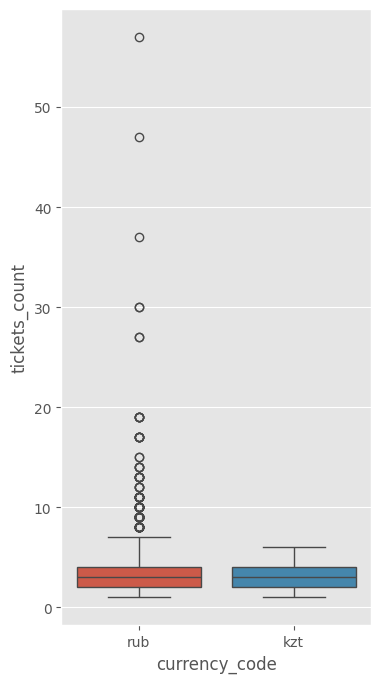

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=final_tickets_orders_filtered, x='currency_code', y='tickets_count', hue='currency_code')
plt.show()

Из графика видно, что присутствуют выбросы. Чтобы дальше корректно продолжить анализ, ограничимся 99 процентилем по колонке с выручкой для каждой валюты.

Также ограничимся 99 процентилем по колонке с количеством билетов.

In [ ]:
revenue_q = (
    final_tickets_orders_filtered.groupby('currency_code')['revenue'].quantile(0.99)
    .rename('revenue_q')
    .reset_index()
)

final_tickets_orders_filtered = final_tickets_orders_filtered.merge(revenue_q, how='left', on='currency_code')

final_tickets_orders_filtered['tickets_count_q'] = final_tickets_orders_filtered['tickets_count'].quantile(0.99)

final_tickets_orders_filtered = (
    final_tickets_orders_filtered[(final_tickets_orders_filtered['tickets_count'] <= final_tickets_orders_filtered['tickets_count_q'])]
    .reset_index(drop=True)
)

final_tickets_orders_quantile_filtered = (
    final_tickets_orders_filtered[(final_tickets_orders_filtered['revenue'] <= final_tickets_orders_filtered['revenue_q'])]
    .reset_index(drop=True)
)

display(final_tickets_orders_quantile_filtered.shape)

(287457, 16)

### Обработка дупликатов

In [ ]:
final_tickets_orders_quantile_filtered.duplicated().sum()

np.int64(0)

In [ ]:
duplicates_subset = ['user_id', 'event_id', 'total', 'revenue', 'tickets_count']
(
    final_tickets_orders_quantile_filtered[duplicates_subset].duplicated()
    .agg(['sum', 'mean'])
    .reset_index()
    .pivot_table(columns='index')
    .rename_axis(None, axis=1)
    .apply(lambda col: col.apply(lambda x: '{:.2%}'.format(x)) if col.name == 'mean' else col.astype('int'))
)

,mean,sum
0,24.25%,69722


В таблице присутсвуют дупликаты, чтобы отобрать их корректно проверку нужно делать по нескольким столбцам. Появление таких строк может являться следствием технических ошибок. Для дальнейшего анализа следует отфильтровать таблицу.

In [ ]:
(
    final_tickets_orders_quantile_filtered[final_tickets_orders_quantile_filtered[duplicates_subset].duplicated()]
    [duplicates_subset + ['created_ts_msk']]
    .sort_values(by=['user_id', 'event_id', 'created_ts_msk'])
    .reset_index(drop=True)
    .head(10)
)

,user_id,event_id,total,revenue,tickets_count,created_ts_msk
0,000cf0659a9f40f,516728,17773.869141,1421.910034,4,2024-06-20 10:51:10
1,000cf0659a9f40f,516728,17773.869141,1421.910034,4,2024-06-20 10:56:16
2,000cf0659a9f40f,516728,17773.869141,1421.910034,4,2024-06-20 12:40:27
3,000cf0659a9f40f,516728,17773.869141,1421.910034,4,2024-06-20 12:42:12
4,000cf0659a9f40f,516728,8886.940430,710.950012,2,2024-06-20 12:46:11
5,000cf0659a9f40f,516728,13330.400391,1066.430054,3,2024-06-21 04:18:44
6,000cf0659a9f40f,516728,13330.400391,1066.430054,3,2024-06-21 04:33:56
7,000cf0659a9f40f,516728,13330.400391,1066.430054,3,2024-06-21 04:34:58
8,000cf0659a9f40f,516728,13330.400391,1066.430054,3,2024-06-21 04:35:38
9,000cf0659a9f40f,516728,17773.869141,1421.910034,4,2024-06-21 04:36:17


In [ ]:
final_tickets_orders_filtered_final = (
    final_tickets_orders_quantile_filtered.drop_duplicates(subset=duplicates_subset, keep='first')
)

final_tickets_orders_filtered_final.shape

(217735, 16)

### Перевод данных по заказам к единой валюте

In [ ]:
final_tickets_tenge['data'].nunique() == len(final_tickets_tenge)

True

In [ ]:
final_tickets_tenge['nominal'].unique().tolist()

[100]

In [ ]:
final_tickets_tenge['cdx'].unique().tolist()

['kzt']

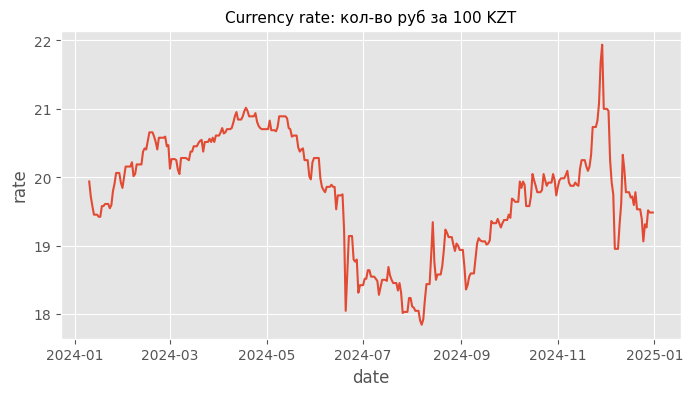

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=final_tickets_tenge, x='data', y='curs')
plt.title('Currency rate: кол-во руб за 100 KZT', fontsize=11)
plt.xlabel('date')
plt.ylabel('rate')
plt.show()

In [ ]:
final_tickets_tenge['kzt_rub_rate'] = final_tickets_tenge['curs'] / final_tickets_tenge['nominal']

final_tickets_orders_quantile_filtered = (
    final_tickets_orders_quantile_filtered
    .merge(
        final_tickets_tenge.rename(columns={'data': 'created_dt_msk'})[['created_dt_msk', 'kzt_rub_rate']]
        , how='left'
        , on='created_dt_msk'
    )
)

final_tickets_orders_filtered_final.loc[final_tickets_orders_filtered_final['currency_code'] == 'rub', 'kzt_rub_rate'] = 1

final_tickets_orders_filtered_final['revenue_rub'] = (
    final_tickets_orders_filtered_final['revenue'] + final_tickets_orders_filtered_final['kzt_rub_rate']
    )

In [ ]:
revenue_per_ticket = (
    final_tickets_orders_filtered_final.groupby('event_id')[['revenue_rub', 'tickets_count']].sum()
    .reset_index()
)

revenue_per_ticket['one_ticket_revenue_rub'] = revenue_per_ticket['revenue_rub'] / revenue_per_ticket['tickets_count']

In [ ]:
revenue_per_ticket.head(10)

,event_id,revenue_rub,tickets_count,one_ticket_revenue_rub
0,4436,851.159973,4,212.789993
1,5785,60.160000,1,60.160000
2,8817,10280.570312,19,541.082648
3,8849,20388.159302,29,703.039976
4,8850,21651.949951,55,393.671817
5,8858,43845.659515,122,359.390652
6,8863,23692.139893,52,455.618075
7,9041,219.929993,5,43.985999
8,9942,668.410004,22,30.382273
9,9992,55.599998,1,55.599998


In [ ]:
final_tickets_orders_filtered_final['month'] = final_tickets_orders_filtered_final['created_dt_msk'].dt.month

def month_to_season(row):
    month = row['month']
    if month in [12,1,2]:
        return 'зима'
    elif month in [3,4,5]:
        return 'весна'
    elif month in [6,7,8]:
        return 'лето'
    elif month in [9,10,11]:
        return 'осень'


final_tickets_orders_filtered_final['season'] = final_tickets_orders_filtered_final.apply(month_to_season, axis=1)

## Промежуточный вывод

В таблицы были внесены следующие изменения:

**final_tickets_orders**:

Столбцы `created_dt_msk` и `created_ts_msk` приведены к типу данных datetime, столбец `age_limit` был оптимизирован до int8. Была проведена следующая фильтрация - `total` >= 0, чтобы исключить отрицательные значения в столбце и корректно проводить следующий анализ.

Обнаружены выбросы в некоторых столбцах, поэтому создана таблица **final_tickets_orders_quantile_filtered**, которая содержит отфильтрованные строки по 99 процентилю столбцов `revenue`(обеих валют) и `tickets_count`.

Из 287457 строк ранее созданной таблицы удалены дупликаты в количестве 69722 строк (~25% данных), результат записан в **final_tickets_orders_filtered_final**.

Добавлены все столбцы из таблицы **final_tickets_tenge**. Созданы столбцы `revenue_rub` - выручка приведена к единой валюте (руб.), `one_ticket_revenue_rub` - выручка с продажи одного билета на мероприятие, `month` - содержит месяц заказа, `season` - время года.

**final_tickets_tenge**:

Столбец `data` приведен к типу datetime, `nominal` оптимизирован до int8.

Остальные таблицы остались без изменений

## 3. Исследовательский анализ данных

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

In [ ]:
tickets_count_per_month = (
  final_tickets_orders_filtered_final.groupby('month')['tickets_count'].sum()
  .reset_index()
  )

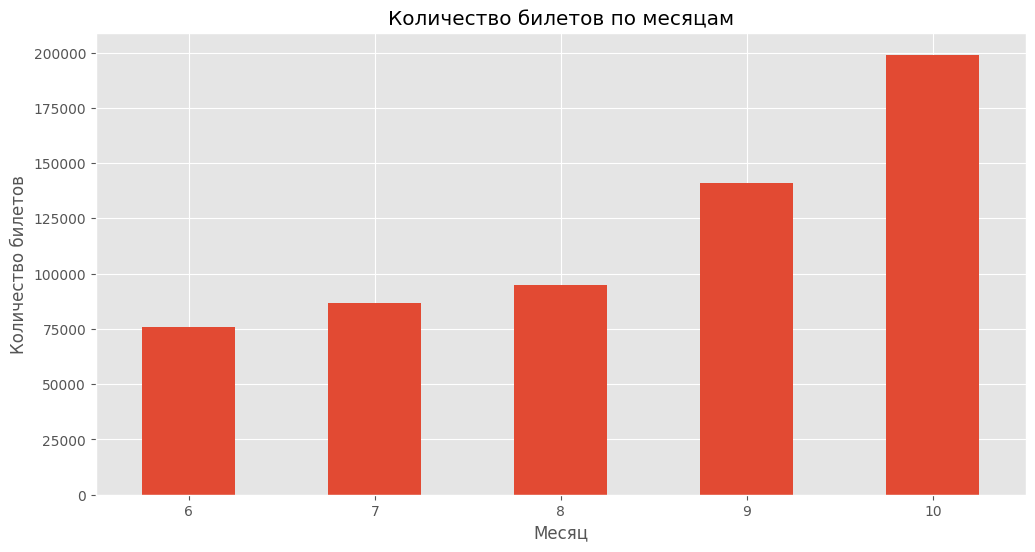

In [ ]:
tickets_count_per_month.plot(
    kind='bar',
    x='month',
    y='tickets_count',
    legend=False,
    title='Количество билетов по месяцам',
    xlabel='Месяц',
    ylabel='Количество билетов',
    figsize=(12,6),
    rot=0
)

plt.show()

Из графика виден рост количества заказов с каждым месяцем, начиная с июня и до ноября. Осенью этот рост существенный. Это может говорить о факторе сезонности сервиса.

In [ ]:
final_tickets_orders_filtered_final= (
    final_tickets_orders_filtered_final
    .merge(final_tickets_events[['event_id', 'event_type_main', 'region_name']], how='left', on='event_id')
)

#### Доля билетов в разрезе сезона и типа мероприятия

In [ ]:
ticket_count_per_season_event_type = (
    final_tickets_orders_filtered_final
    .groupby(['season', 'event_type_main'])
    .agg(tickets_count=('tickets_count', 'sum')).reset_index()
    )

tickets_count_per_season = (
    final_tickets_orders_filtered_final
    .groupby('season')
    .agg(tickets_count_per_season=('tickets_count', 'sum')).reset_index()
    )

ticket_count_per_season_event_type = (
    ticket_count_per_season_event_type
    .merge(tickets_count_per_season, how='left', on='season')
    )

ticket_count_per_season_event_type['share'] = (
    ticket_count_per_season_event_type['tickets_count'] / ticket_count_per_season_event_type['tickets_count_per_season']
  )

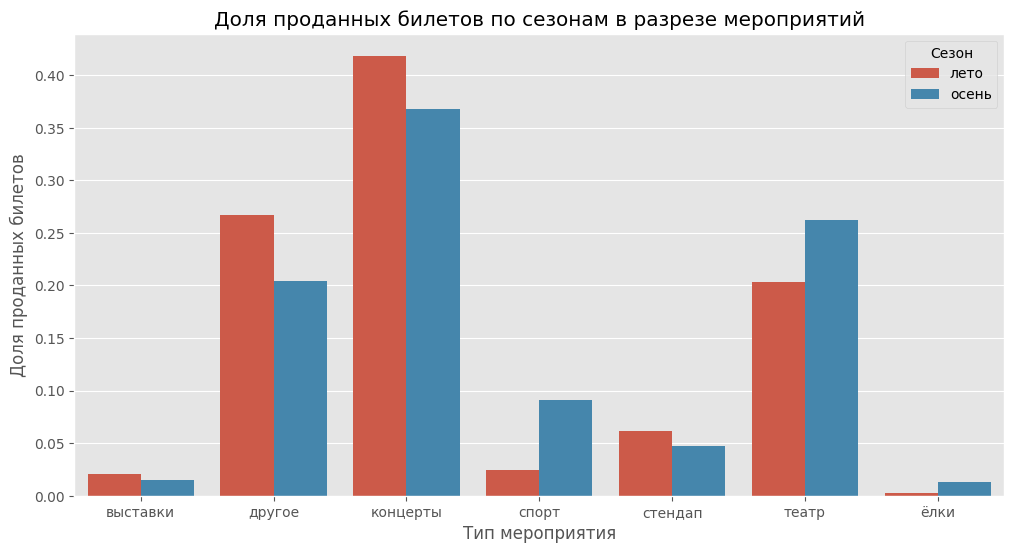

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=ticket_count_per_season_event_type,
    x='event_type_main',
    y='share',
    hue='season'
)

plt.title('Доля проданных билетов по сезонам в разрезе мероприятий')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля проданных билетов')
plt.legend(title='Сезон')
plt.xticks(rotation=0)
plt.show()

In [ ]:
ticket_count_per_season_event_type

,season,event_type_main,tickets_count,tickets_count_per_season,share
0,лето,выставки,5228,257369,0.020313
1,лето,другое,68834,257369,0.267453
2,лето,концерты,107708,257369,0.418496
3,лето,спорт,6205,257369,0.024109
4,лето,стендап,15907,257369,0.061806
5,лето,театр,52311,257369,0.203253
6,лето,ёлки,715,257369,0.002778
7,осень,выставки,5049,340158,0.014843
8,осень,другое,69554,340158,0.204476
9,осень,концерты,125002,340158,0.367482


Летом больше всего билетов было продано на концерты, театр и другое. Концерты составляют более трети проданных билетов.

Больше всего билетов осенью также было продано на концерты, театр и другое. Заметен рост категорий спорт и театр, а также спад категорий концерты и другое.

Доля проданных билетов на концерты летом больше, так как летом много открытых площадок для концертов и люди предпочитают больше проводить время на улице. Осенью в театре обычно ставят новые премьеры и все возвращаются с отпусков, это может объяснять рост проданных билетов.

#### Доля билетов в разрезе сезона и девайса

In [ ]:
ticket_count_per_season_device_type = (
    final_tickets_orders_filtered_final
    .groupby(['season', 'device_type_canonical'])
    .agg(tickets_count=('tickets_count', 'sum')).reset_index()
    )

ticket_count_per_season_device_type = (
    ticket_count_per_season_device_type
    .merge(tickets_count_per_season, how='left', on='season')
    )

ticket_count_per_season_device_type['share'] = (
    ticket_count_per_season_device_type['tickets_count'] / ticket_count_per_season_device_type['tickets_count_per_season']
    )

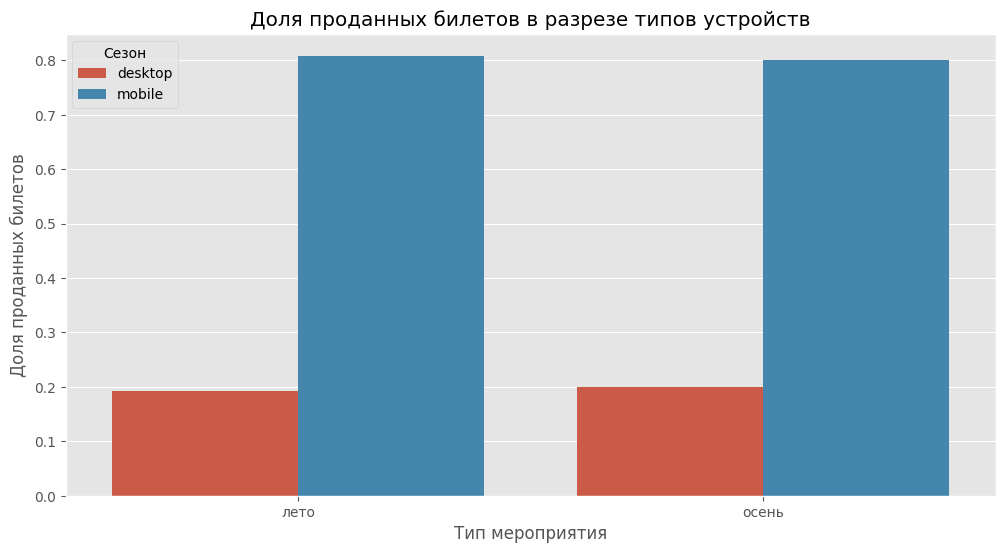

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=ticket_count_per_season_device_type,
    x='season',
    y='share',
    hue='device_type_canonical'
)

plt.title('Доля проданных билетов в разрезе типов устройств')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля проданных билетов')
plt.legend(title='Сезон')
plt.xticks(rotation=0)
plt.show()

Из графика видно, что больше всего билетов летом покупают с помощью мобильного устройства. Это логично, так как телефон всегда под рукой.

#### Доля билетов в разрезе сезона и возрастного ограничения

In [ ]:
tickets_count_per_season_age_limit = (
    final_tickets_orders_filtered_final
    .groupby(['season', 'age_limit'])
    .agg(tickets_count=('tickets_count', 'sum')).reset_index()
    )

tickets_count_per_season_age_limit = (
    tickets_count_per_season_age_limit
    .merge(tickets_count_per_season, how='left', on='season')
    )

tickets_count_per_season_age_limit['share'] = (
    tickets_count_per_season_age_limit['tickets_count'] / tickets_count_per_season_age_limit['tickets_count_per_season']
    )

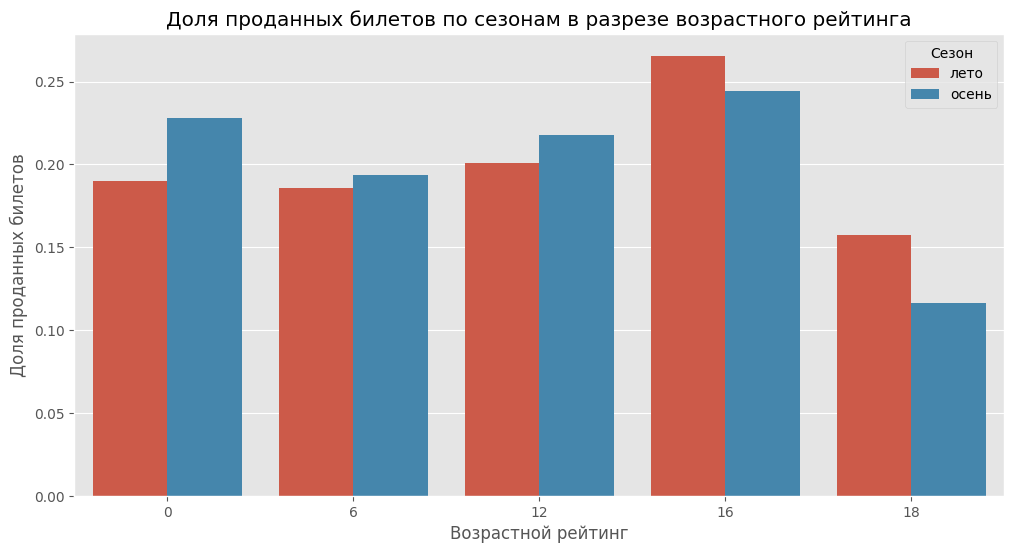

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=tickets_count_per_season_age_limit,
    x='age_limit',
    y='share',
    hue='season'
)

plt.title('Доля проданных билетов по сезонам в разрезе возрастного рейтинга')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Доля проданных билетов')
plt.legend(title='Сезон')
plt.xticks(rotation=0)
plt.show()

Видно, что летом преобладают мероприятия с возрастным рейтингом 16. Наименее популярным рейтингом является 18.

Осенью больше всего билетов также покупают на мероприятия с возрастным рейтингом 16, но также и на рейтинг 0 и 12.

In [ ]:
revenue_per_season_event_type = (
    final_tickets_orders_filtered_final
    .groupby(['season', 'event_type_main'])
    .agg(revenue_rub=('revenue_rub', 'sum'), tickets_count=('tickets_count', 'sum'))
    .reset_index()
    )

revenue_per_season = (
    final_tickets_orders_filtered_final
    .groupby('season')
    .agg(revenue_rub_total=('revenue_rub', 'sum'))
    .reset_index()
    )

revenue_per_season_event_type = revenue_per_season_event_type.merge(revenue_per_season, how='left', on='season')

revenue_per_season_event_type['one_ticket_revenue_rub'] = (
    revenue_per_season_event_type['revenue_rub'] / revenue_per_season_event_type['tickets_count']
    )

revenue_per_season_event_type['revenue_share'] = (
    revenue_per_season_event_type['revenue_rub'] / revenue_per_season_event_type['revenue_rub_total']
    )

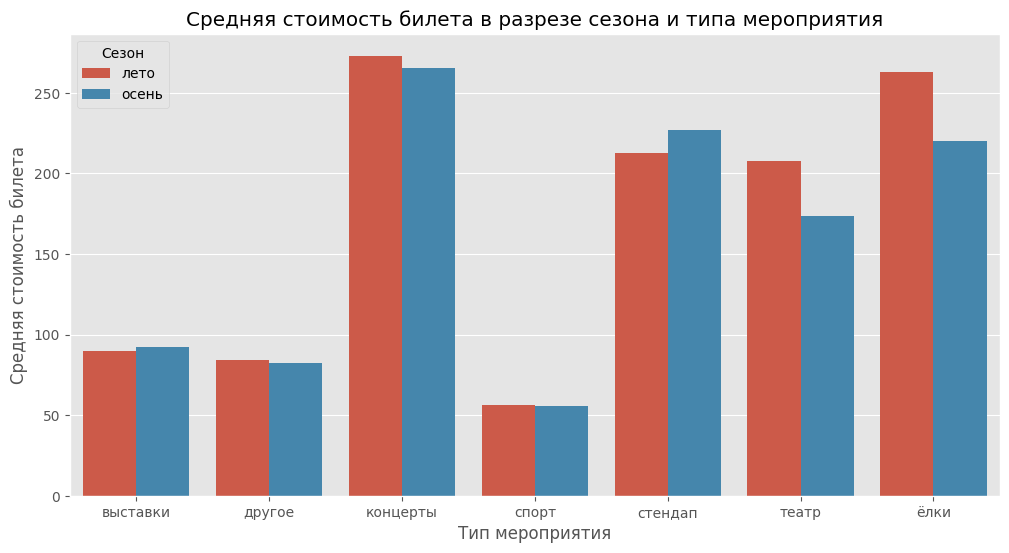

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=revenue_per_season_event_type,
    x='event_type_main',
    y='one_ticket_revenue_rub',
    hue='season'
)

plt.title('Средняя стоимость билета в разрезе сезона и типа мероприятия')
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя стоимость билета')
plt.legend(title='Сезон')
plt.xticks(rotation=0)
plt.show()

Наибольшую стоимость за билет летом имеют концерты и ёлки.

Наибольшую стоимость за билет осенью имеют концерты и стендам, выручка у стендапа возросла по сравнению с летом, а у театра упала.

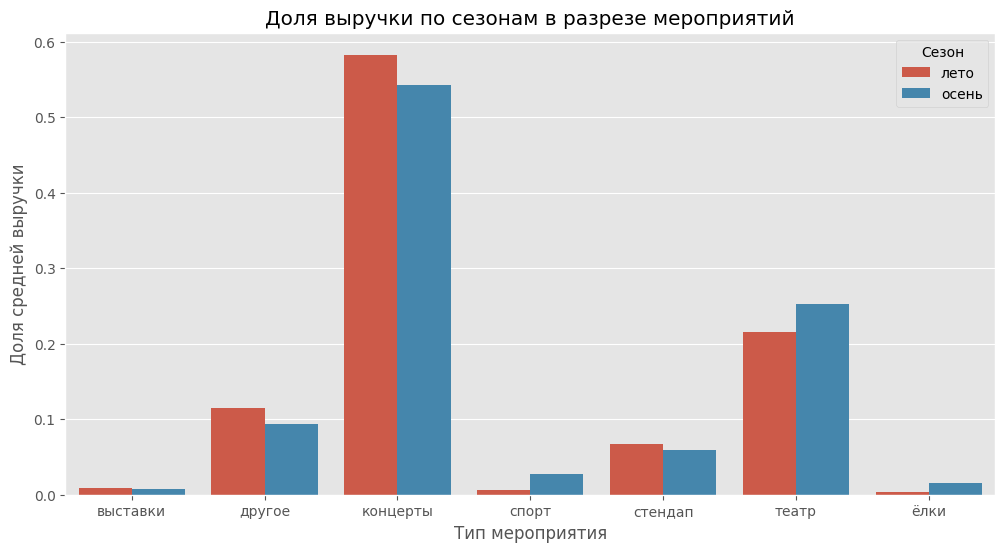

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=revenue_per_season_event_type,
    x='event_type_main',
    y='revenue_share',
    hue='season'
)

plt.title('Доля выручки по сезонам в разрезе мероприятий')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля средней выручки')
plt.legend(title='Сезон')
plt.xticks(rotation=0)
plt.show()

Большую часть выручки приносят концерты и театр. Концерты: 58% выручки летом и 54% осенью. Театр: 21% выручки летом и 25% осенью.

## Промежуточный вывод

С наступлением осени виден рост количества продажи билетов в целом.

В разрезе мероприятий виден рост продажи у таких категорий: спорт(+7%) и театр(+6%). Небольшой спад есть у категорий концерты(-5%) и другое(-7%).

По типу устройств, осенью количество проданных билетов у мобильный устройств упало с 81% до 80%, у компьютеров изменения отсутствуют.

По возрастному рейтингу виден рост у категорий: 0(+4%) и 12(+2%), спад у 16(-2%) и 18(-4%).

Средняя выручка осенью выросла у театра, спорта и ёлок. У сстальных типов мероприятий выручка снизилась по сра  

### 3.2. Осенняя активность пользователей

In [ ]:
autumn_stats = (
    final_tickets_orders_filtered_final[final_tickets_orders_filtered_final['season'] == 'осень']
    .groupby(['created_dt_msk'])
    .agg(dau=('user_id', 'nunique'), orders_count=('order_id', 'nunique'), revenue_rub=('revenue_rub', 'sum'))
    .reset_index()
    )

autumn_stats['avg_order_count_per_user'] = autumn_stats['orders_count'] / autumn_stats['dau']
autumn_stats['avg_order_revenue_rub'] = autumn_stats['revenue_rub'] / autumn_stats['orders_count']

####DAU

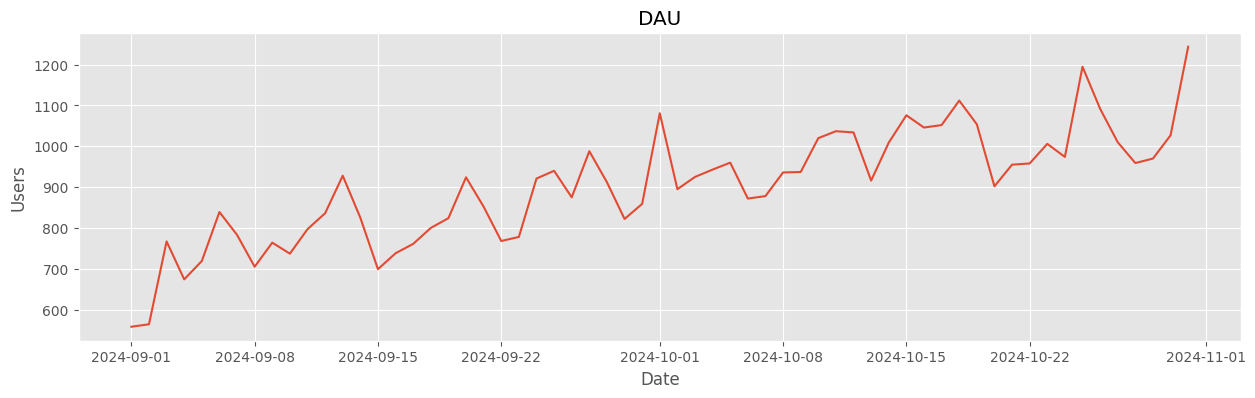

In [ ]:
plt.figure(figsize=(15,4))

sns.lineplot(data=autumn_stats,x='created_dt_msk', y='dau')
plt.title('DAU')
plt.xlabel('Date')
plt.ylabel('Users')
plt.show()

В начале и конце октябре были зафиксированы пиковые значения пользователей в день. Также виден рост этого показателя.

####Количество заказов по дням

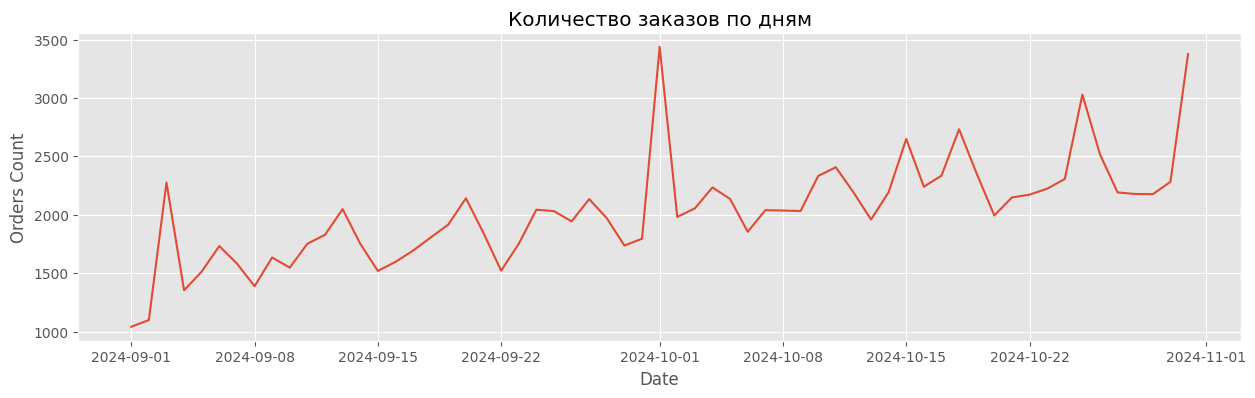

In [ ]:
plt.figure(figsize=(15,4))

sns.lineplot(data=autumn_stats,x='created_dt_msk', y='orders_count')
plt.title('Количество заказов по дням')
plt.xlabel('Date')
plt.ylabel('Orders Count')
plt.show()

В октябре заметен рост количества зазазов в день. Пиковые значения также в этом месяце.

####Среднее кол-во заказов на пользователя

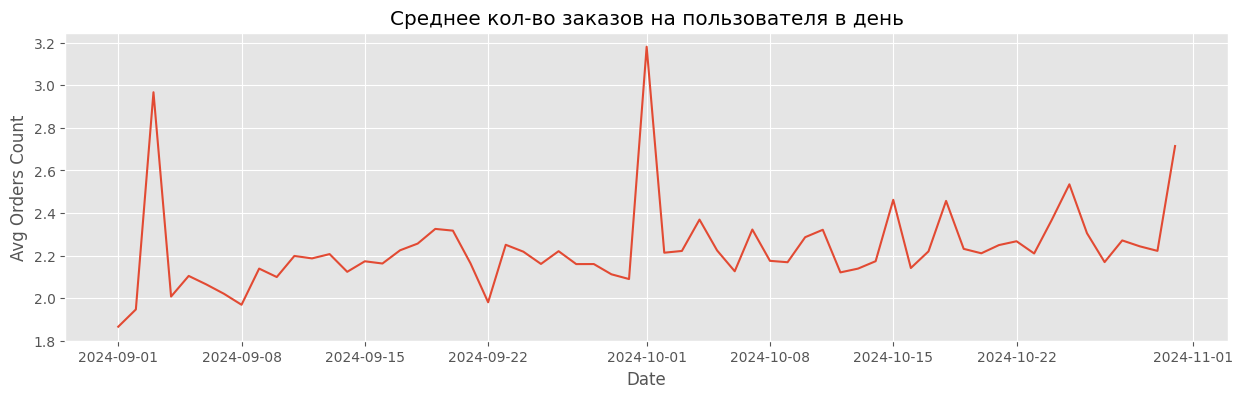

In [ ]:
plt.figure(figsize=(15,4))

sns.lineplot(data=autumn_stats,x='created_dt_msk', y='avg_order_count_per_user')
plt.title('Среднее кол-во заказов на пользователя в день')
plt.xlabel('Date')
plt.ylabel('Avg Orders Count')
plt.show()

Динамика среднего кол-ва заказов колеблется. Пиковые значения приходятся на начало сентября и октября.

####Средняя стоимость заказа

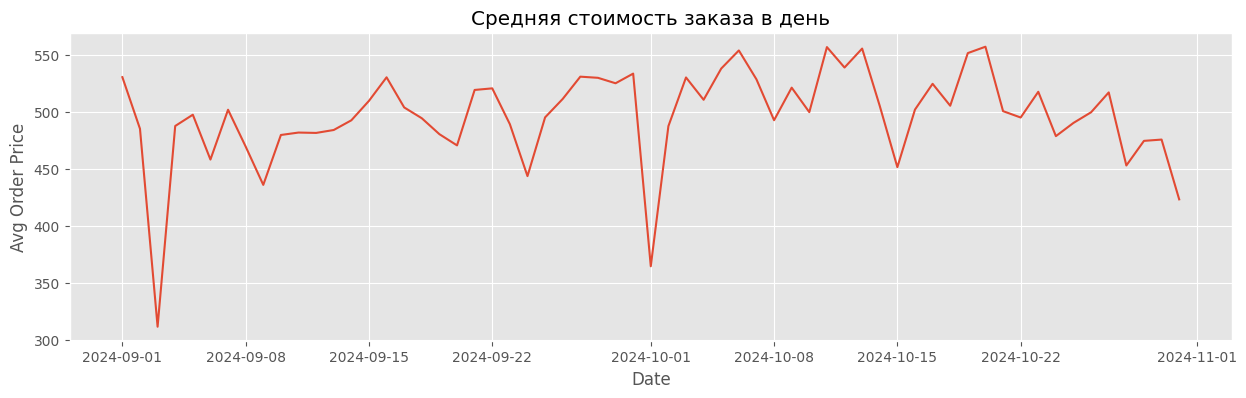

In [ ]:
plt.figure(figsize=(15,4))

sns.lineplot(data=autumn_stats,x='created_dt_msk', y='avg_order_revenue_rub')
plt.title('Средняя стоимость заказа в день')
plt.xlabel('Date')
plt.ylabel('Avg Order Price')
plt.show()

Самая низкая стоимость заказа зафиксирована в начале сентября и октября. В те же дни пиковые значения количества заказов.

In [ ]:
def date_to_weekday(row):
    wd = row['created_dt_msk'].weekday()
    if wd == 0:
        return 'понедельник'
    elif wd == 1:
        return 'вторник'
    elif wd == 2:
        return 'среда'
    elif wd == 3:
        return 'четверг'
    elif wd == 4:
        return 'пятница'
    elif wd == 5:
        return 'суббота'
    elif wd == 6:
        return 'воскресенье'

autumn_stats['week_day'] = autumn_stats.apply(date_to_weekday, axis=1)

In [ ]:
autumn_stats

,created_dt_msk,dau,orders_count,revenue_rub,avg_order_count_per_user,avg_order_revenue_rub,week_day
0,2024-09-01,558,1041,5.526055e+05,1.865591,530.841057,воскресенье
1,2024-09-02,564,1098,5.329814e+05,1.946809,485.411076,понедельник
2,2024-09-03,767,2276,7.084300e+05,2.967405,311.260998,вторник
3,2024-09-04,674,1353,6.600852e+05,2.007418,487.867842,среда
4,2024-09-05,719,1513,7.531610e+05,2.104312,497.793140,четверг
...,...,...,...,...,...,...,...
56,2024-10-27,1010,2191,1.133649e+06,2.169307,517.411630,воскресенье
57,2024-10-28,959,2178,9.869002e+05,2.271116,453.122236,понедельник
58,2024-10-29,970,2176,1.033135e+06,2.243299,474.786254,вторник
59,2024-10-30,1027,2282,1.086050e+06,2.222006,475.920052,среда


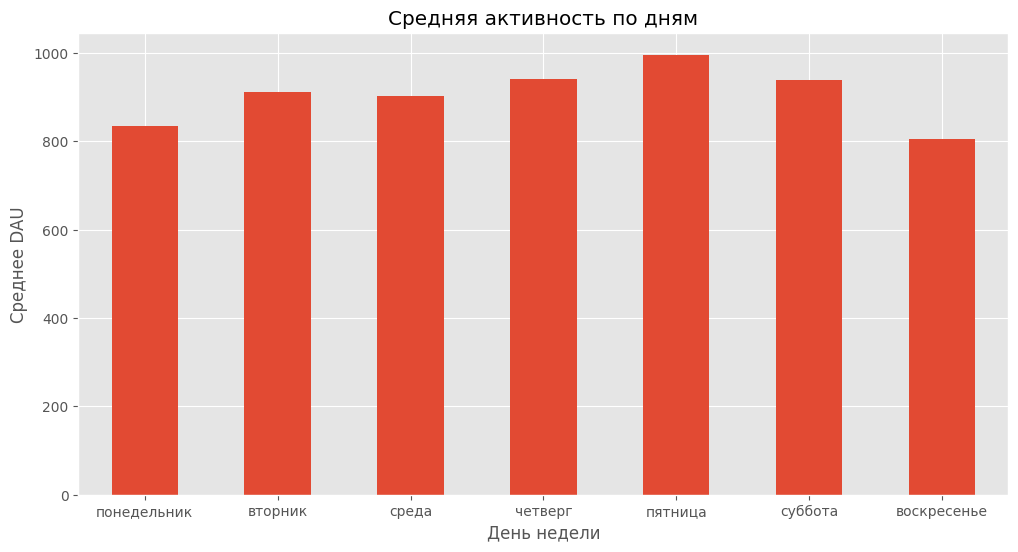

In [ ]:
week_day_filtered = ['понедельник','вторник','среда','четверг','пятница','суббота','воскресенье']

dau_by_day = autumn_stats.groupby('week_day')['dau'].mean()

dau_by_day.index = pd.CategoricalIndex(
    dau_by_day.index,
    categories=week_day_filtered,
    ordered=True
    )

dau_by_day = dau_by_day.sort_index()

dau_by_day.plot(
    kind='bar',
    title='Средняя активность по дням',
    xlabel='День недели',
    ylabel='Среднее DAU',
    figsize=(12, 6),
    rot=0
)
plt.show()

Четверг и пятница являются наиболее активными днями у пользователей, в то время как понедельник и воскресенье имеют небольшую активность.

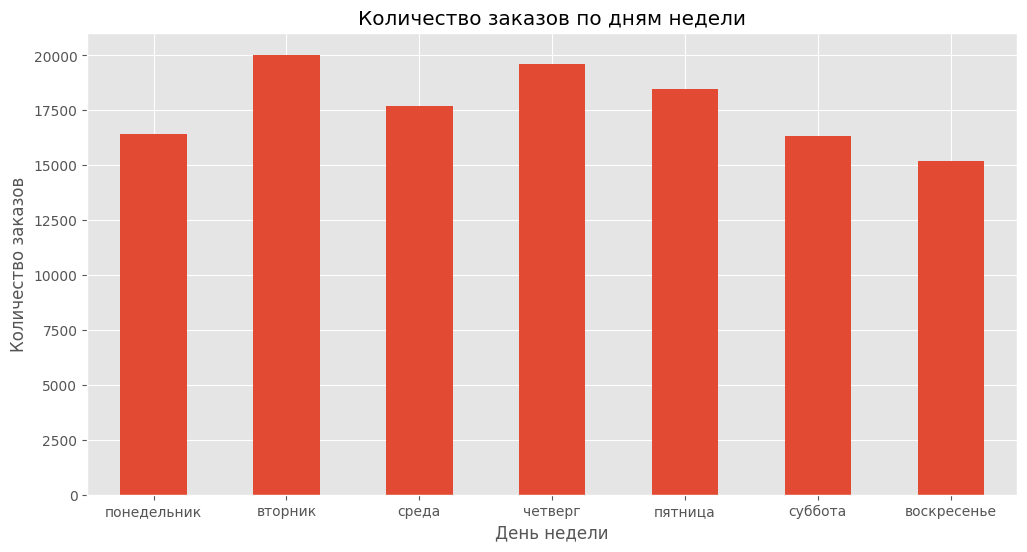

In [ ]:
order_by_day = autumn_stats.groupby('week_day')['orders_count'].sum()

order_by_day.index = pd.CategoricalIndex(order_by_day.index, categories=week_day_filtered, ordered=True)


order_by_day.sort_index().plot(
    kind='bar',
    x='week_day',
    y='dau',
    legend=False,
    title='Количество заказов по дням недели',
    xlabel='День недели',
    ylabel='Количество заказов',
    figsize=(12,6),
    rot=0
)

plt.show()

Вторник и четверг преобладает над другими днями по количеству заказов. Наименьшее количество заказов приходятся на выходные.

## Промежуточный вывод

Из графиков видно, что начало и конец октярбря - это пиковые значения количества пользователей в день(dau) и количества заказов.

В начале сентября и в начале октября пиковые значения среднего количества билетов, но в те же дни минимальные значения средней стоимости билета, возможно, это связано со скидками или какой-то акцией.

Воскресенье и понедельник - дни, когда пользователи наименее активны, особенно выделяется воскресенье. Наиболее активными днями явяляются четверг и пятница.

##  3.3. Популярные события и партнёры

In [ ]:
event_by_region = (
    final_tickets_orders_filtered_final[final_tickets_orders_filtered_final['season'] == 'осень']
    .groupby('region_name')
    .agg(
        events_count=('event_id', 'nunique'),
        orders_count=('order_id', 'nunique'),
        revenue_rub=('revenue_rub', 'sum')
        )
    .reset_index()
    )

event_by_region['share_events'] = event_by_region['events_count'] / event_by_region['events_count'].sum()
event_by_region['share_orders'] = event_by_region['orders_count'] / event_by_region['orders_count'].sum()
event_by_region['share_revenue'] = event_by_region['revenue_rub'] / event_by_region['revenue_rub'].sum()

In [ ]:
event_by_region.sort_values(by='events_count', ascending=False).reset_index(drop=True).head()

,region_name,events_count,orders_count,revenue_rub,share_events,share_orders,share_revenue
0,Каменевский регион,3898,35187,2.170596e+07,0.246506,0.284328,0.354893
1,Североярская область,2606,16430,8.395210e+06,0.164801,0.132762,0.137262
2,Широковская область,796,6666,3.203169e+06,0.050338,0.053864,0.052372
3,Светополянский округ,760,3692,1.507347e+06,0.048062,0.029833,0.024645
4,Речиновская область,528,2814,1.362412e+06,0.033390,0.022738,0.022275


In [ ]:
event_by_region.sort_values(by='orders_count', ascending=False).reset_index(drop=True).head()

,region_name,events_count,orders_count,revenue_rub,share_events,share_orders,share_revenue
0,Каменевский регион,3898,35187,2.170596e+07,0.246506,0.284328,0.354893
1,Североярская область,2606,16430,8.395210e+06,0.164801,0.132762,0.137262
2,Широковская область,796,6666,3.203169e+06,0.050338,0.053864,0.052372
3,Озернинский край,296,5419,4.775419e+06,0.018719,0.043788,0.078078
4,Медовская область,368,5054,1.347340e+06,0.023272,0.040839,0.022029


In [ ]:
event_by_org = (
    final_tickets_orders_filtered_final[final_tickets_orders_filtered_final['season'] == 'осень']
    .groupby('service_name')
    .agg(
        events_count=('event_id', 'nunique'),
        orders_count=('order_id', 'nunique'),
        revenue_rub=('revenue_rub', 'sum')
        )
    .reset_index()
    )

event_by_org['share_events'] = event_by_org['events_count'] / event_by_org['events_count'].sum()
event_by_org['share_orders'] = event_by_org['orders_count'] / event_by_org['orders_count'].sum()
event_by_org['share_revenue'] = event_by_org['revenue_rub'] / event_by_org['revenue_rub'].sum()

<Axes: title={'center': 'Доля мероприятий осенью по билетным партнерам'}, xlabel='Билетный партнер', ylabel='Доля мероприятий'>

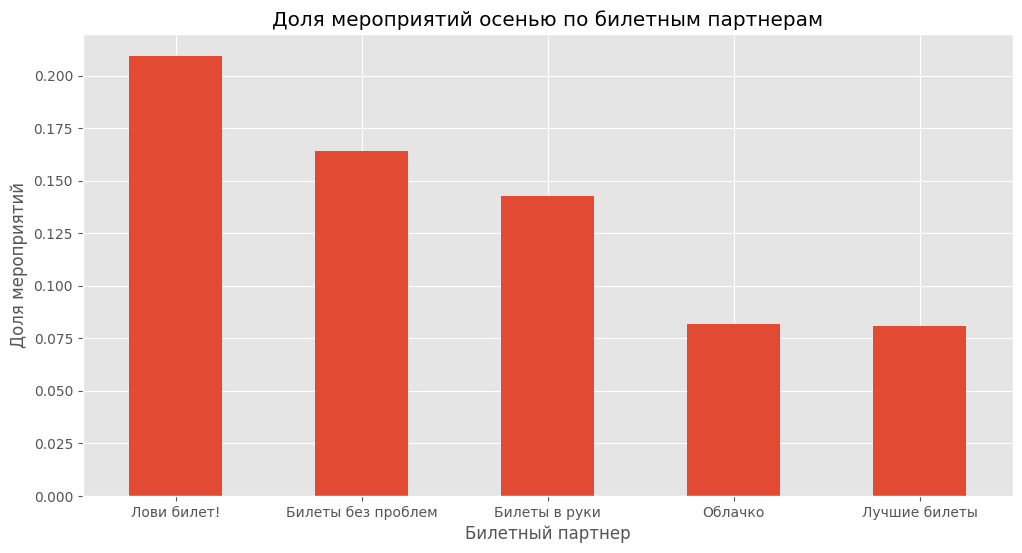

In [ ]:
(event_by_org.sort_values(by='events_count', ascending=False).reset_index(drop=True).head()).plot(
    kind='bar',
    x='service_name',
    y='share_events',
    legend=False,
    title='Доля мероприятий осенью по билетным партнерам',
    xlabel='Билетный партнер',
    ylabel='Доля мероприятий',
    figsize=(12,6),
    rot=0
    )

Наибольшее количество мероприятий осенью проводил билетный партнер "Лови билет!", 21% от всех мероприятий.

<Axes: title={'center': 'Доля мероприятий осенью по билетным партнерам'}, xlabel='Билетный партнер', ylabel='Доля выручки'>

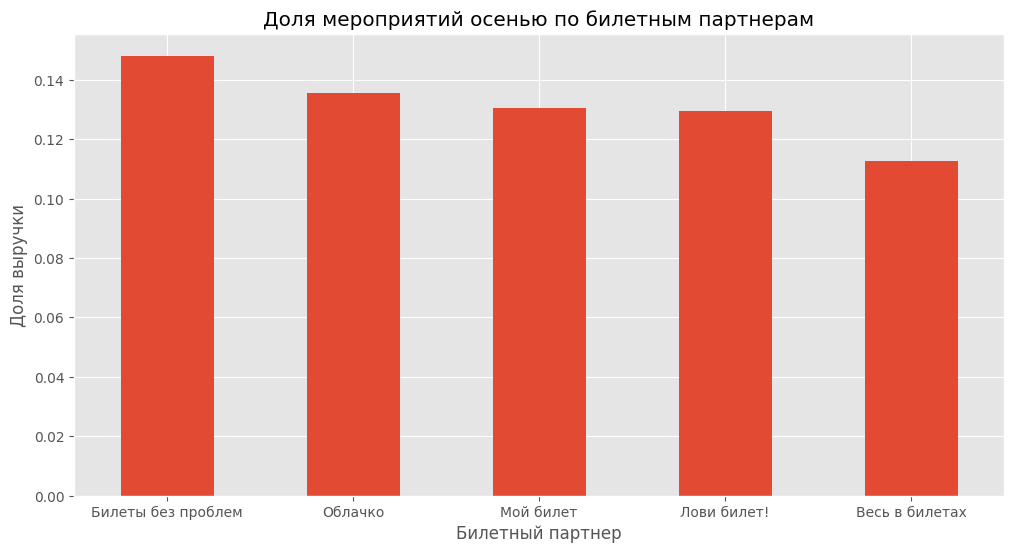

In [ ]:
(event_by_org.sort_values(by='share_revenue', ascending=False).reset_index(drop=True).head()).plot(
    kind='bar',
    x='service_name',
    y='share_revenue',
    legend=False,
    title='Доля мероприятий осенью по билетным партнерам',
    xlabel='Билетный партнер',
    ylabel='Доля выручки',
    figsize=(12,6),
    rot=0
    )

Наибольшую выручку осенью принес билетный партнер "Билеты без проблем", 17% от всей выручки.

<Axes: title={'center': 'Доля заказов по билетным партнерам'}, xlabel='Билетный партнер', ylabel='Доля заказов'>

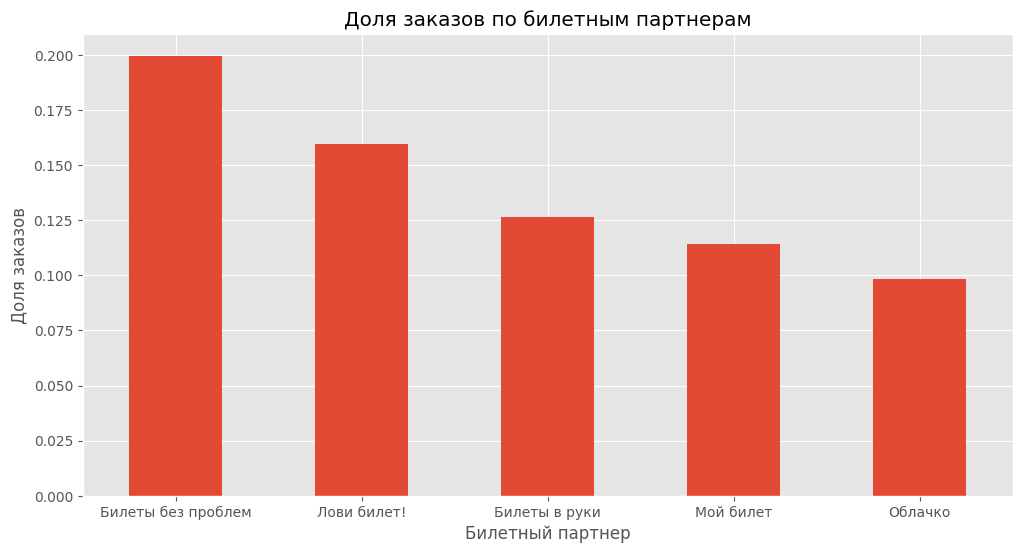

In [ ]:
(event_by_org.sort_values(by='share_orders', ascending=False).reset_index(drop=True).head()).plot(
    kind='bar',
    x='service_name',
    y='share_orders',
    legend=False,
    title='Доля заказов по билетным партнерам',
    xlabel='Билетный партнер',
    ylabel='Доля заказов',
    figsize=(12,6),
    rot=0
)

Наибольшая доля заказов осенью также была у билетного партнера "Билеты без проблем", 22% от всех заказов.

## Предварительный вывод

По количеству мероприятий лидируют следующий регионы: Каменевский регион(25% от всех мероприятий), Североярская область(16% от всех мероприятий), Широковская область(5% от всех мероприятий).

По количеству заказов в разрезе регионов лидируют те же регионы с теми же долями.

Самое большое количество мероприятий провели следующие операторы: Лови билет(21% от всех мероприятий), Билеты без проблем(16% от всех мероприятий), Билеты в руки(14% от всех мероприятий).

Наибольшую выручку принесли операторы: Билеты без проблем(15% от всей выручки), Облачко(13% от всей выручки), Мой билет(13% от всей выручки).

Больше всего заказов у операторов: Билеты без проблем(20% от всех заказов), Лови билет!(16% от всех заказов), Билеты в руки(13% от всех заказов).

Явные лидеры по операторам: Билеты без проблем, Лови билет! и Билеты в руки.

## Общий вывод и рекомендации

### **Информация о данных:**

Таблица `final_tickets_orders` содержит 290849 строк и 14 столбцов. Пропуски содержатся только в столбце days_since_prev (~8%), что удовлетворяет условию: если у пользователя до этого не было покупок, то данные содержат пропуск.

Таблица `final_tickets_events` содержит 22427 строк и 11 столбцов. Пропуски отсутствуют.

Таблица `final_tickets_tenge` содержит 357 строк и 4 столбца. Пропуски отсутствуют.

### **Результаты анализа:**

Наиболее востребованые мероприятия по двум сезонам - концерты, театр и другое. Осенью заметен рост категорий спорт (с 2% до 9%) и театр (с 20% до 26%), также есть и спад на категории концерты (с 42% до 37%) и другое (с 27% до 20%).

Самую большую среднюю выручку приносят концерты, стендап и ёлки. Осенью выручка на концерты не поменялась (24%), стендап (с 18% до 20%) и ёлки (с 20% до 21%).

Пользовательская активность растет, особенно в октябре - количество заказов и пользователей по дням растет, но имеются и небольшие просадки. Вторник и четверг являются наиболее активными днями у пользователей, как по их количеству, так и по заказам, в то время как выходные имеют небольшую активность.

По числу заказов можно выделить регионы: Каменевский регион (28%), Североярская область (13%) и Широковская область (5%).

По выручке с продажи билетов можно выделить регионы: Каменевский регион (35%), Североярская область (14%) и Широковская область (5%).

По возрастному рейтингу по двум сезонам популярный рейтинг - 16, но также и востребоваными рейтингами являются 0 и 12. Непопулярным рейтингом является 18. Осенью спад у рейтингов 16 (с 27% до 24%) и 18 (с 16% до 12%), рост у 0 (с 19% до 23%) и 12 (с 20% до 22%).

### **Рекомендации:**

Чтобы повысить количество пользователей в выходные, следует предлагать уникальные предложения и акции в эти дни, а также экслюзивные скидки на одного из билетного оператора - Лови билет, Билеты без проблем, Билеты в руки или в определенном городе. Также и для выставок, так как у них небольшая посещаемость, то специальные предложения могут повысить количество проданных билетов на это мероприятие.

